Sveučilište u Zagrebu  
Fakultet elektrotehnike i računarstva  
  
## Bioinformatika 1

### 1. Čitanje podataka

In [2]:
import os
from Bio import SeqIO
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from pandas import DataFrame
from sklearn.cluster import KMeans

In [65]:
notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J29B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J29_B_CE_IonXpress_005.fastq")


expected = list(SeqIO.parse(path, "fasta"))

data = list(SeqIO.parse(pathFASTQ, "fastq"))





In [66]:
from Bio import Align

global_aligner = Align.PairwiseAligner()
global_aligner.mode = 'global'
global_aligner.match_score = 1
global_aligner.open_gap_score = -1
global_aligner.extend_gap_score = -1
global_aligner.target_end_gap_score = 0
global_aligner.query_end_gap_score = -0.5

    

In [67]:
sub='GATCCTCTCTCTGCAGCACATTTCCTG'
pre='CAGCGGCGAGGTGACGCGAA'

scores=[]
result=[]
for sequence in data:
    replaced = str(sequence.seq).replace(sub,'').replace(pre,'')
    if(len(replaced)==249):
        alignments0 = global_aligner.align(expected[0].seq,replaced)  
        alignments1 = global_aligner.align(expected[1].seq,replaced)  
        alignments2 = global_aligner.align(expected[2].seq,replaced)  
        if((alignments0[0].score>240)or(alignments1[0].score>240)or(alignments2[0].score>240) ):
        
        
            result.append(replaced)
            scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])




In [68]:
print(scores)

[[232.0, 248.0, 222.0], [226.0, 241.0, 216.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [233.0, 249.0, 223.0], [228.0, 244.0, 218.0], [243.0, 227.0, 213.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [246.0, 230.0, 216.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [233.0, 249.0, 223.0], [233.0, 249.0, 223.0], [248.0, 234.0, 218.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [233.0, 249.0, 223.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [248.0, 232.0, 218.0], [248.0, 232.0, 218.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [230.0, 246.0, 220.0], [249.0, 233.0, 219.0], [249.0, 233.0, 219.0], [249.0, 23

In [83]:
from sklearn.preprocessing import StandardScaler
scores_standard = StandardScaler().fit_transform(scores)
print(scores_standard)

#STANDARDIZACIJA SCOREA

[[-3.57935607  4.75316053  1.60917559]
 [-4.95866348  2.49693053 -1.45078829]
 [ 0.32868161 -0.08161804  0.07919365]
 ...
 [ 0.09879704 -0.40393661 -0.43080033]
 [ 0.32868161 -0.08161804  0.07919365]
 [ 0.32868161 -0.08161804  0.07919365]]


In [87]:
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)
print(principalDf.PC1.values)
print(principalDf.PC2.values)

#PREBACUJEM U DVIJE DIM

           PC1       PC2
0    21.043899 -4.620706
1    21.739345 -0.465245
2    -1.320647 -0.188887
3    -1.123946  0.374489
4    20.847198 -5.184083
..         ...       ...
771  -1.320647 -0.188887
772   4.874188  2.670749
773  -1.123946  0.374489
774  -1.320647 -0.188887
775  -1.320647 -0.188887

[776 rows x 2 columns]
[ 2.10438994e+01  2.17393451e+01 -1.32064711e+00 -1.12394613e+00
  2.08471984e+01  2.18307034e+01 -1.40441222e-01 -1.32064711e+00
 -1.32064711e+00 -7.30544165e-01 -1.32064711e+00  2.08471984e+01
 -1.32064711e+00 -1.32064711e+00 -1.32064711e+00  2.08471984e+01
 -1.32064711e+00 -1.32064711e+00 -1.12394613e+00 -1.32064711e+00
 -1.12394613e+00 -1.12394613e+00 -1.32064711e+00  2.08471984e+01
  2.08471984e+01 -1.54425661e-01 -1.32064711e+00 -1.32064711e+00
 -1.12394613e+00  2.08471984e+01 -1.32064711e+00 -1.32064711e+00
 -1.32064711e+00 -1.32064711e+00 -1.32064711e+00 -1.12394613e+00
 -1.12394613e+00 -1.32064711e+00 -1.32064711e+00 -1.32064711e+00
  2.14373014e+01 -1.320647

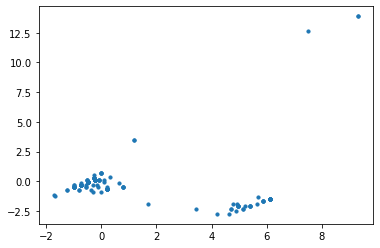

In [85]:
plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)

C:\Users\Ana\miniconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1038: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


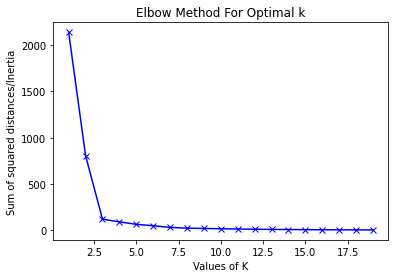

In [86]:
K = range(1,20)
Sum_of_squared_distance = []
for num_clusters in K :
 kmeans = KMeans(n_clusters=num_clusters)
 kmeans.fit(principalDf)
 Sum_of_squared_distance.append(kmeans.inertia_)
plt.plot(K,Sum_of_squared_distance,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Sum of squared distances/Inertia') 
plt.title('Elbow Method For Optimal k')
plt.show()

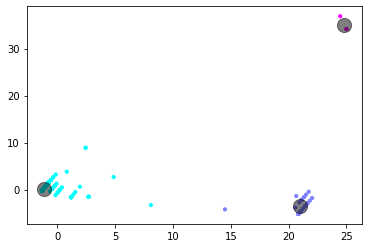

In [88]:
K=3
kmeansTHEONE = KMeans(K).fit(principalDf)
predictions = kmeansTHEONE.predict(principalDf)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values, c=predictions, s=10, cmap='cool')
centers = kmeansTHEONE.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# K MEANS SA K=3

In [89]:
print(centers)

[[-1.12562745e+00  2.82403876e-02]
 [ 2.09758165e+01 -3.50077616e+00]
 [ 2.48193462e+01  3.50715921e+01]]


In [100]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.0017):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.1):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<1):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

[(3, [248.0, 232.0, 218.0]), (18, [248.0, 232.0, 218.0]), (20, [248.0, 232.0, 218.0]), (21, [248.0, 232.0, 218.0]), (28, [248.0, 232.0, 218.0]), (35, [248.0, 232.0, 218.0]), (36, [248.0, 232.0, 218.0]), (46, [248.0, 232.0, 218.0]), (47, [248.0, 232.0, 218.0]), (54, [248.0, 232.0, 218.0]), (56, [248.0, 232.0, 218.0]), (57, [248.0, 232.0, 218.0]), (63, [248.0, 232.0, 218.0]), (68, [248.0, 232.0, 218.0]), (74, [248.0, 232.0, 218.0]), (89, [248.0, 232.0, 218.0]), (96, [248.0, 232.0, 218.0]), (117, [248.0, 232.0, 218.0]), (122, [248.0, 232.0, 218.0]), (125, [248.0, 232.0, 218.0]), (141, [248.0, 232.0, 218.0]), (155, [248.0, 232.0, 218.0]), (159, [248.0, 232.0, 218.0]), (163, [248.0, 232.0, 218.0]), (166, [248.0, 232.0, 218.0]), (167, [248.0, 232.0, 218.0]), (170, [248.0, 232.0, 218.0]), (172, [248.0, 232.0, 218.0]), (173, [248.0, 232.0, 218.0]), (177, [248.0, 232.0, 218.0]), (186, [248.0, 232.0, 218.0]), (195, [248.0, 232.0, 218.0]), (208, [248.0, 232.0, 218.0]), (216, [248.0, 232.0, 218.0]

In [101]:
clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = global_aligner.align(result[i[0]],result[j[0]])
            shorter=min(len(result[i[0]]),len(result[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))

[[0. 2. 2. ... 2. 2. 2.]
 [2. 0. 2. ... 2. 2. 2.]
 [2. 2. 0. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 0. 2. 2.]
 [2. 2. 2. ... 2. 0. 2.]
 [2. 2. 2. ... 2. 2. 0.]]
Matrix mean= 1.9737034331628927
[[0. 2. 2. 4. 2.]
 [2. 0. 2. 4. 2.]
 [2. 2. 0. 4. 2.]
 [4. 4. 4. 0. 4.]
 [2. 2. 2. 4. 0.]]
Matrix mean= 2.24
[[0. 8. 2.]
 [8. 0. 7.]
 [2. 7. 0.]]
Matrix mean= 3.7777777777777777


In [102]:
for k in range(K):
    for i in clusters[k]:
        print(result[i[0]])
        print()
    print("*******************************************************************************************************")

CTGTATGCTAAGAGCGAGTGTCATCTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCGGACACAACTACGGCGGCGTTGAGAGTTTCACTGTG

CTGTATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACAGCGGCGTTGAGAGTTTCACTGTG

CTATATGCTAAGAGCGAGTGTCATTTCTCCAACGGGACGCAGCGGGTGGGGTTCCTGGACAGATACTTCTATAACGGAGAAGAGTTCGTGCGCTTCGACAGCGACTGGGGCGAGTACCGGGCGGTGACAGAGCTGGGGCGGCCGGTGGCCGAGTACCTGAACAGCCAGAAGGAGTACATGGAGCAGACGCGGGCCGAGGTGGACACGTACTGCAGACACAACTACGGCGGCGTTGAGAGTTTCACTG

In [ ]:
## probamo predikciju na j30

            PC1       PC2
0    -19.137045  1.702513
1     25.423095 -0.735510
2    -20.022534 -0.467669
3    -17.876886  2.632130
4     25.423095 -0.735510
...         ...       ...
1070  25.423095 -0.735510
1071 -20.022534 -0.467669
1072  25.423095 -0.735510
1073  25.423095 -0.735510
1074  25.718259 -0.012116

[1075 rows x 2 columns]


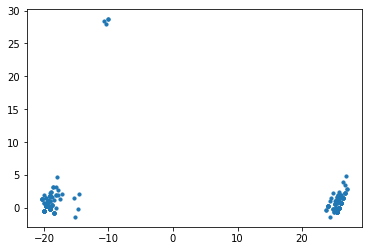

In [103]:


notebook_path = os.path.abspath("genomeClustering.ipynb")
path = os.path.join(os.path.dirname(notebook_path), "data/J30B_expected.fasta")
pathFASTQ= os.path.join(os.path.dirname(notebook_path), "data/J30_B_CE_IonXpress_006.fastq")

expected = list(SeqIO.parse(path, "fasta"))
data = list(SeqIO.parse(pathFASTQ, "fastq"))

from Bio import Align

global_aligner = Align.PairwiseAligner()
global_aligner.mode = 'global'
global_aligner.match_score = 1
global_aligner.open_gap_score = -1
global_aligner.extend_gap_score = -1
global_aligner.target_end_gap_score = 0
global_aligner.query_end_gap_score = -0.5

sub='GATCCTCTCTCTGCAGCACATTTCCTG'
pre='CAGCGGCGAGGTGACGCGAA'

scores=[]
result=[]
for sequence in data:
    replaced = str(sequence.seq).replace(sub,'').replace(pre,'')
    if(len(replaced)==249):
        alignments0 = global_aligner.align(expected[0].seq,replaced)  
        alignments1 = global_aligner.align(expected[1].seq,replaced)  
        alignments2 = global_aligner.align(expected[2].seq,replaced)  
        if((alignments0[0].score>240)or(alignments1[0].score>240)or(alignments2[0].score>240) ):
        
        
            result.append(replaced)
            scores.append([alignments0[0].score,alignments1[0].score,alignments2[0].score])
            



pca = PCA(n_components=2)
principalComponents = pca.fit_transform(scores)
principalDf = pd.DataFrame(data = principalComponents
             , columns = ['PC1', 'PC2'])
print(principalDf)


#PREBACUJEM U DVIJE DIM

plt.scatter(principalDf.PC1.values, principalDf.PC2.values,  cmap=plt.get_cmap("cool"), s=10)


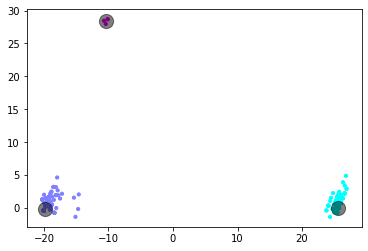

In [104]:

K=3
kmeansTHEONE = KMeans(K).fit(principalDf)

predictions = kmeansTHEONE.predict(principalDf)
plt.scatter(principalDf.PC1.values, principalDf.PC2.values, c=predictions, s=10, cmap='cool')
centers = kmeansTHEONE.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);


# K MEANS SA K=3

In [106]:
cluster1=[]
cluster2=[]
cluster3=[]
for i in range (len(principalComponents)): 
    if(abs((principalComponents[i][0])-centers[0][0])<0.1):
        cluster1.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[1][0])<0.1):
        cluster2.append((i,scores[i]))
    if(abs((principalComponents[i][0])-centers[2][0])<0.1):
        cluster3.append((i,scores[i]))
        
print(cluster1)
print()
print(cluster2)
print()
print(cluster3)
print()

[(233, [215.0, 245.0, 211.0]), (823, [215.0, 245.0, 211.0]), (1054, [216.0, 246.0, 211.0])]

[(18, [248.0, 217.0, 225.0]), (29, [248.0, 217.0, 225.0]), (57, [248.0, 217.0, 225.0]), (62, [248.0, 217.0, 225.0]), (72, [248.0, 217.0, 225.0]), (86, [248.0, 217.0, 225.0]), (87, [248.0, 217.0, 225.0]), (96, [248.0, 217.0, 225.0]), (104, [248.0, 217.0, 225.0]), (107, [248.0, 217.0, 225.0]), (116, [248.0, 217.0, 225.0]), (121, [248.0, 217.0, 225.0]), (124, [248.0, 217.0, 225.0]), (130, [248.0, 217.0, 225.0]), (134, [248.0, 217.0, 225.0]), (145, [248.0, 217.0, 225.0]), (151, [248.0, 217.0, 225.0]), (163, [248.0, 217.0, 225.0]), (165, [248.0, 217.0, 225.0]), (168, [248.0, 217.0, 225.0]), (175, [248.0, 217.0, 225.0]), (182, [248.0, 217.0, 225.0]), (187, [248.0, 217.0, 225.0]), (192, [248.0, 217.0, 225.0]), (195, [248.0, 217.0, 225.0]), (197, [248.0, 217.0, 225.0]), (212, [248.0, 217.0, 225.0]), (219, [248.0, 217.0, 225.0]), (221, [248.0, 217.0, 225.0]), (224, [248.0, 217.0, 225.0]), (230, [248.0, 

In [107]:

clusters=[cluster1,cluster2,cluster3]
for k in range(K):
    matrix=[]
    for i in clusters[k]:
        row=[]
        for j in clusters[k]:
            alignments = global_aligner.align(result[i[0]],result[j[0]])
            shorter=min(len(result[i[0]]),len(result[j[0]]))
            row.append(shorter-alignments[0].score)
        matrix.append(row)
    matrix=np.array(matrix)        
    print(matrix)
    print("Matrix mean=", np.mean(matrix))
    
for k in range(K):
    for i in clusters[k]:
        print(result[i[0]])
        print()
    print("*******************************************************************************************************")

[[0. 8. 5.]
 [8. 0. 7.]
 [5. 7. 0.]]
Matrix mean= 4.444444444444445
[[0. 2. 2. ... 2. 2. 2.]
 [2. 0. 2. ... 2. 2. 2.]
 [2. 2. 0. ... 2. 2. 2.]
 ...
 [2. 2. 2. ... 0. 2. 2.]
 [2. 2. 2. ... 2. 0. 2.]
 [2. 2. 2. ... 2. 2. 0.]]
Matrix mean= 1.9675080793082365
[[0.]]
Matrix mean= 0.0
GAGCATCTTAAGGCCGAGTGTCATTTCTTCAACGGGACGGAGCGGATGCAGTTCCTGGCGAGATACTTCTATAACGGAGAAGAGTACGCGCGCTTCGACAGCGACGTGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGGCGGCCGGACGCCAAGTACTGGAACAGCCAGAAGGAGATCCTGGAGCAGCACGGGGCAGAGGTGGACAGGTACTGCAGACACAACTACGGGGTCGTGAGAGTTTCACTGTG

GAGCATCATAAGGCCGAGTGTCATTTCTTCAACGGGACGGAGCGGATGCAGTTCCTGGCGAGATACTTCTATAACGGAGAAGAGTACGCGCGCTTCGACAGCGACGTGGGCGAGTTCCGGGCGGTGACCTGAGCGGGGCGGCCGGACGCCAAGTACTGGAACAGCCAGAAGGAGATCCTGGAGCAGCACCGGGCAGAGGTGGACAGGTACTGCAGACACAACTACGGGGTCGGTGAGAGTTTCACTGTG

GAGCATCTTAAGGCCGAGTGTCATTTCTTCAACGGGACGGAGCGGATGCAGTTCCTGGCGAGATACTTCTATAACGGAGAAGAGCACGCGCGCTTCGACAGCGACGTGGGCGAGTTCCGGGCGGTGACCGAGCTGGGGCGGCCGGACGCCAAGTACTGGAACAGCCAGAAGGAGATCTTGGAGCAGCACGGGGCAGAGGTGGACAGGTACTGCAGACA